<a href="https://colab.research.google.com/github/yogiannanf/PembelajaranMesin/blob/main/Praktikum11_ConvolutionalNeuralNetwork(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Job Sheet 11: Convolutional Neural Network (CNN)**

Nama : Yogianna Nur Febrianti

Kelas : TI 3A

Absen : 28

**Praktikum 1**

Klasifikasi 🐱 dan 🐶

Deskripsi

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

Dataset

Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.

**Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Menghubungkan ke google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

**Langkah 2.1. Pra Pengolahan Data Training**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Machine_Learn/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8020 images belonging to 2 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_Machine_Learn/dataset/dataset/training_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8020 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN**

**Langkah 3.1.  - Inisiasi Model CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan **loss function binary crossentropy** dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

**Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 874s 3s/step - accuracy: 0.5287 - loss: 0.7088 - val_accuracy: 0.6520 - val_loss: 0.6324
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 222s 683ms/step - accuracy: 0.6481 - loss: 0.6319 - val_accuracy: 0.7002 - val_loss: 0.5775
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 177s 580ms/step - accuracy: 0.6986 - loss: 0.5809 - val_accuracy: 0.7460 - val_loss: 0.5245
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 175s 692ms/step - accuracy: 0.7334 - loss: 0.5437 - val_accuracy: 0.7746 - val_loss: 0.4796
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 174s 686ms/step - accuracy: 0.7578 - loss: 0.5059 - val_accuracy: 0.7883 - val_loss: 0.4555
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 203s 690ms/step - accuracy: 0.7522 - loss: 0.4982 - val_accuracy: 0.7788 - val_loss: 0.4656
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 173s 572ms/step - accuracy: 0.7717 - loss: 0.4736 - val_accuracy: 0.7955 - val_loss: 0.4343
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 174s 686ms/step - accuracy: 0.7821 - loss: 0.4529 

**Langkah 5 - Prediksi dengan 1 Citra**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Data_Machine_Learn/dataset/dataset/training_set/dogs/dog.10.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


**Praktikum 2**

Klasifikasi Multi-label dengan Data CIFAT

Desclaimer:

Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

Deskripsi

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

**Langkah 1 - Load Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Langkah 3 - Verifikasi Data**

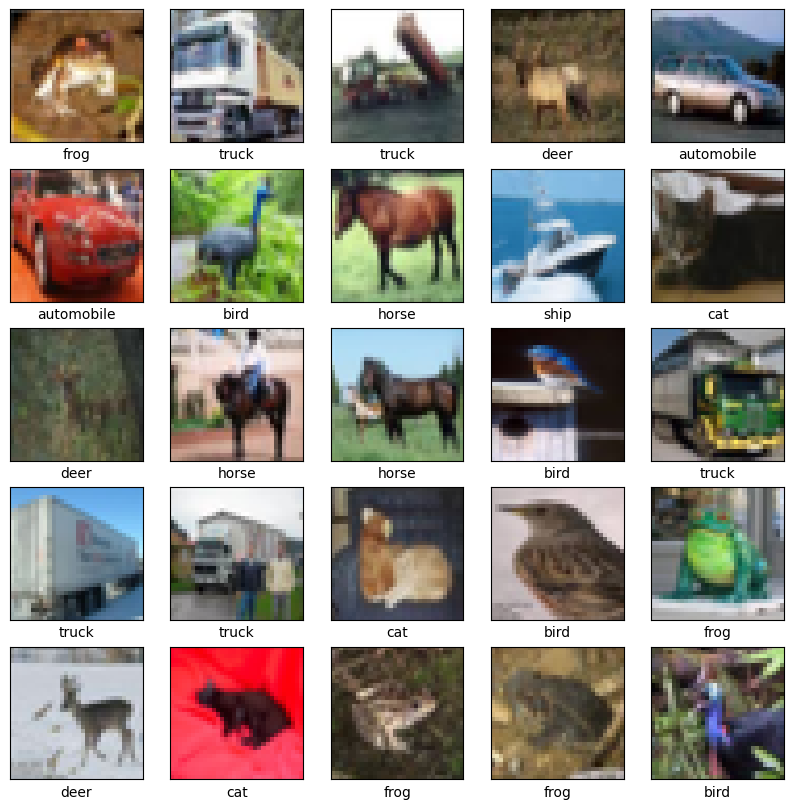

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Langkah 4.5. - Compile Model CNN**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.8117 - loss: 0.5373 - val_accuracy: 0.7059 - val_loss: 0.9024
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.8189 - loss: 0.5095 - val_accuracy: 0.7053 - val_loss: 0.9238
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.8353 - loss: 0.4677 - val_accuracy: 0.7060 - val_loss: 0.9566
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8429 - loss: 0.4472 - val_accuracy: 0.6971 - val_loss: 1.0183
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.8564 - loss: 0.4035 - val_accuracy: 0.7045 - val_loss: 1.0227
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.8637 - loss: 0.3849 - val_accuracy: 0.6991 - val_loss: 1.0550
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.8748 - loss: 0.3548 - val_accuracy: 0.6983 - val_loss: 1.0813
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.8807 -

**Langkah 6 - Evaluasi Model**

313/313 - 6s - 18ms/step - accuracy: 0.6937 - loss: 1.2302


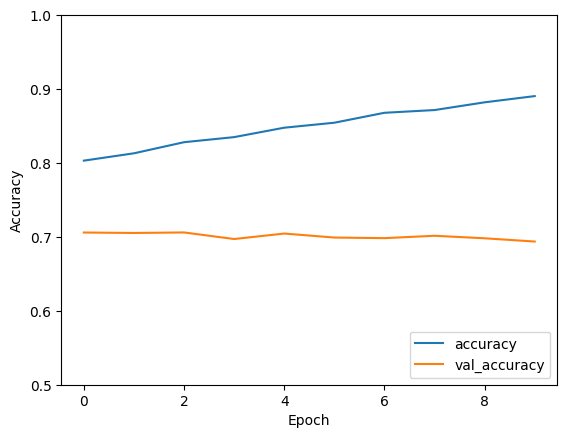

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

**Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.6937000155448914


**🚨Tugas 1**

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

- Langkah 1 - Load Library

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

- Langkah 2 - Unduh Dataset CIFAR

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


- Langkah 3 - Verifikasi Data

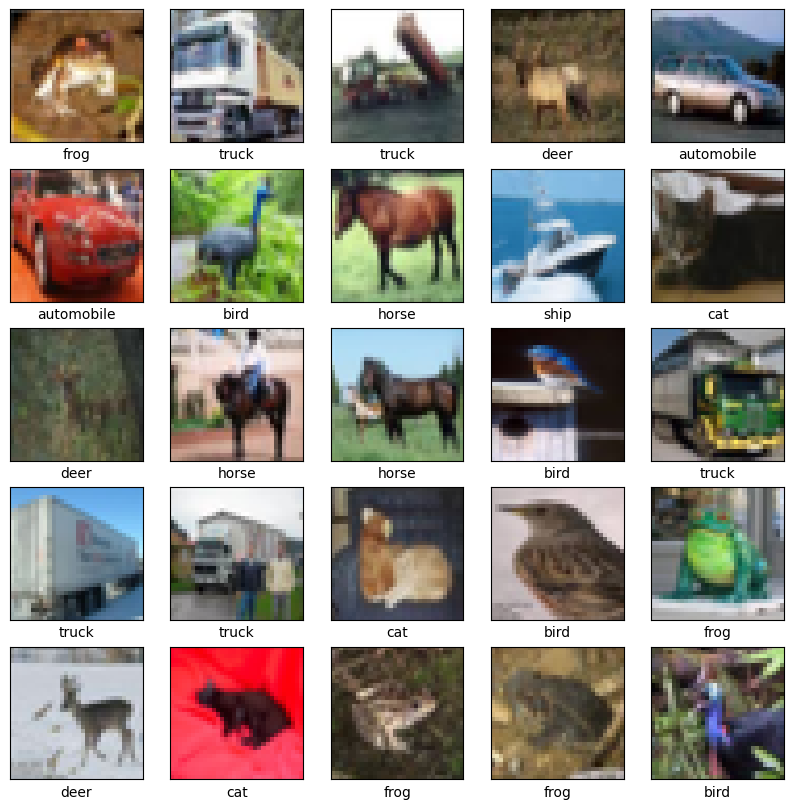

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

- Langkah 4 - Buat Model CNN

- Langkah 4.1. - Buat Layer Konvolusi

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(units = 10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 - Langkah 4.2. - Cek Arsitektur Konvolusi

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

  - Langkah 4.3. - Compile Model CNN

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

- Langkah 5 - Fit Model

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 302ms/step - accuracy: 0.8826 - loss: 0.3296 - val_accuracy: 0.8381 - val_loss: 0.5110
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 506s 304ms/step - accuracy: 0.8847 - loss: 0.3188 - val_accuracy: 0.8343 - val_loss: 0.5081
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 491s 297ms/step - accuracy: 0.8853 - loss: 0.3170 - val_accuracy: 0.8385 - val_loss: 0.4856
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 504s 298ms/step - accuracy: 0.8892 - loss: 0.3118 - val_accuracy: 0.8256 - val_loss: 0.5409
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 463s 296ms/step - accuracy: 0.8906 - loss: 0.3071 - val_accuracy: 0.8413 - val_loss: 0.5033
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 498s 294ms/step - accuracy: 0.8923 - loss: 0.2991 - val_accuracy: 0.8398 - val_loss: 0.4916
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 462s 296ms/step - accuracy: 0.8934 - loss: 0.2958 - val_accuracy: 0.8313 - val_loss: 0.5319
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 465s 297ms/step - ac

- Langkah 6 - Evaluasi Model

313/313 - 21s - 66ms/step - accuracy: 0.8466 - loss: 0.4814


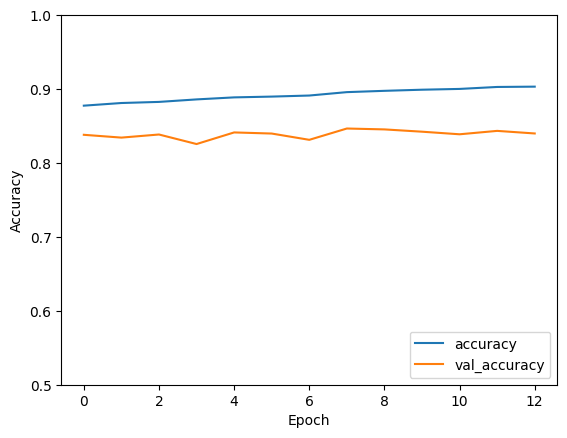

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

- Langkah 7 - Cetak Hasil Akurasi

In [26]:
print(test_acc)

0.8465999960899353


**🚨Tugas 2**

Buatlah model CNN untuk klasifikasi dataset MNIST.

- Langkah 1 - Import Library

In [13]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras import layers
from keras import backend as k

- Langkah 2 - Load Data

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- Langkah 3 - Normalisasi Dataset

In [15]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

- Langkah 4 - Build Model

In [16]:
model_mnist = models.Sequential()

model_mnist.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=inpx, activation='elu'))
model_mnist.add(layers.Conv2D(64, kernel_size=(3,3), activation='elu'))
model_mnist.add(layers.MaxPooling2D(pool_size=(3,3)))
model_mnist.add(layers.Dropout(0.5))
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(256, activation='sigmoid'))
model_mnist.add(layers.Dense(10, activation='softmax'))

model_mnist.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070,218 (4.08 MB)

 Trainable params: 1,070,218 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

- Langkah 5 - Compile Model MNIST

In [17]:
model_mnist.compile(optimizer="adam",
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])

- Langkah 6 - Fit Model

In [18]:
history = model_mnist.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 97ms/step - accuracy: 0.9073 - loss: 0.3079 - val_accuracy: 0.9855 - val_loss: 0.0461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 98ms/step - accuracy: 0.9829 - loss: 0.0574 - val_accuracy: 0.9852 - val_loss: 0.0454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 182s 97ms/step - accuracy: 0.9877 - loss: 0.0430 - val_accuracy: 0.9874 - val_loss: 0.0385
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 98ms/step - accuracy: 0.9889 - loss: 0.0352 - val_accuracy: 0.9881 - val_loss: 0.0380
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 97ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9883 - val_loss: 0.0336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 98ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9886 - val_loss: 0.0323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 97ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9895 - val_loss: 0.0324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 97ms/step - accuracy: 

- Langkah 7 - Evaluasi Model

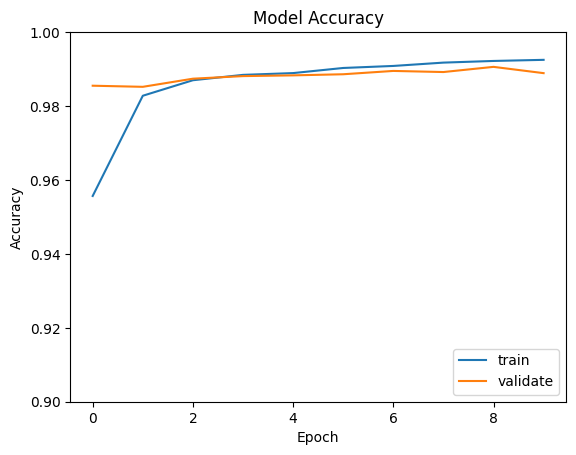

In [19]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

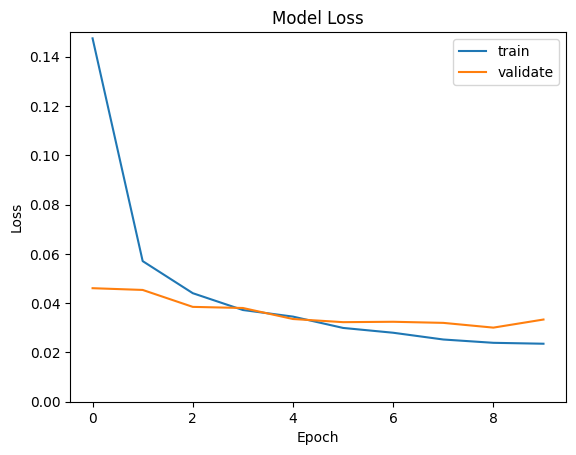

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.15])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

- Langkah 8 - Cek Hasil Akurasi

In [21]:
print(f"Akurasi: {history.history['val_accuracy'][-1]:.4f}")

Akurasi: 0.9889
